In [107]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting
import matplotlib.cm as cm
import scipy as sp
from sklearn.cluster import KMeans as km
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


np.random.seed(42) 

3. Import of the .csv file

In [108]:
# df=pd.read_csv('marketing.csv')
# df.fillna(0,inplace=True)
# df

In [109]:
df = pd.read_csv('air_traffic.csv')
df

,is_more_than_100_passengers?,is_after_2010?,is_summer?,is_winter?,is_spring?,is_authmn?,alaska_airlines?,delta_air_lines?,skywest_airlines?,united_airlines?,virgin_america?,other_airline?,is_from_america?,is_international_airline?,is_lowcost?,is_departing?
0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0
1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1
2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0
3,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1
15003,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0
15004,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1
15005,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


5. Num cases:

In [110]:
print("num rows: "+str(df.shape[0]))

num rows: 15007


6. Num features:

In [111]:
print("num cols: "+str(df.shape[1]))

num cols: 16


7. The data points are represented as binary values. For each instance, the feature x is either 0 - not the feature, or 1 - the feature.

In [112]:
# X, y = make_blobs(
#     n_samples=500,
#     n_features=16,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility
# print(X.shape, y.shape)
# type(X),type(y)


In [113]:
# X_train, X_test = train_test_split(
#     X, 
#     test_size=0.2, 
#     shuffle=False
# )
# X_train.shape, X_test.shape

In [114]:
# y_pred = km(n_clusters=4, random_state=100).fit_predict(X_train)
# y_pred

In [115]:
# X,y = df.iloc[:,:-1], df.iloc[:,-1]
X=df
print(X.shape)
print(type(X))
X=X.to_numpy()
type(X)


(15007, 16)
<class 'pandas.core.frame.DataFrame'>


numpy.ndarray

In [116]:
# X = np.linspace(0, 10, 30)
# y = np.sin(X)
# plt.plot(y_pred, 'o')
# plt.plot(X, 'o')


In [178]:
def get_clusterer(points, k):
    clusterer = km(n_clusters=k, n_init=10)
    preds = clusterer.fit_predict(points)
    return clusterer, preds


distance_metric = 'euclidean'
K = 7
k_range = np.arange(2, K, 1)
clusterer, preds = get_clusterer(df, K)


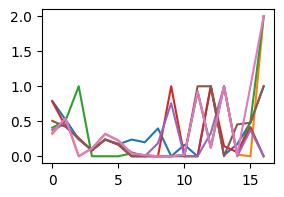

In [179]:
# Define a function that will show the model's results numerically and visually
def show_results (clusterer):
    # print('labels:', clusterer.labels_, '\n')
    centers = clusterer.cluster_centers_
    # print('centroids:')
    # for i in range(K):
    #     print(i, ":", centers[i,:],'\n')
    plt.figure(figsize=(3,2))
    for i in range(len(clusterer.cluster_centers_)):
        plt.plot(centers[i,:])
    plt.show()
# Call the function
show_results(clusterer)

In [180]:
# Define a function that will show the model's silhouette
def calc_silhouette(df, preds):
    sil = silhouette_score(df, preds, metric = distance_metric)
    # print('silhouette:', sil)
    return sil
    
# Call the function
calc_silhouette (df, preds)

0.18894322621442552

In [182]:
silhouettes_by_k = []
for clusters in k_range:
    clusterer, preds = get_clusterer(X, clusters)
    print(preds)
    # print("for ", k, " clusters:")
    silhouettes_by_k.append(calc_silhouette(df, preds))
    # show_results(clusterer)
silhouettes_by_k

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 2 2]
[1 1 1 ... 2 3 2]
[1 1 1 ... 3 2 3]
[0 0 0 ... 1 1 1]


[0.20784045896836287,
 0.24515102474622044,
 0.1450953524141283,
 0.16228041701315185,
 0.1518831050760947]

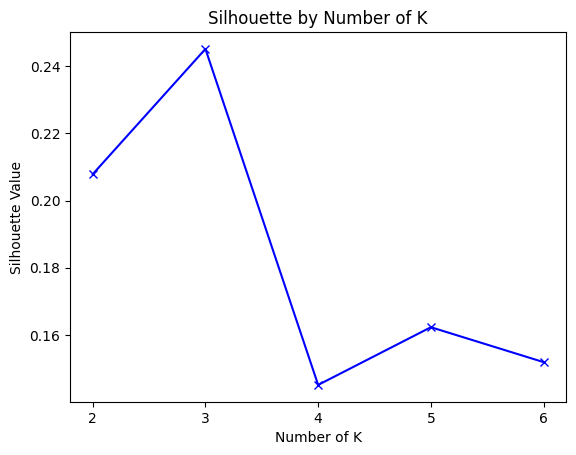

In [183]:
# Define a function that will show visually for each K its silouette
def show_silhouettes (silhouettes_by_k):
    plt.plot(k_range, silhouettes_by_k, 'bx-')
    plt.title('Silhouette by Number of K')
    plt.xlabel('Number of K')
    plt.ylabel('Silhouette Value')
    plt.xticks(k_range)
plt.show()
    
# Call the function
show_silhouettes (silhouettes_by_k)

We can see by the graph that K=3 is best for our purposes. Over that we get little deminishing returns (and no gurrantee for betterment).

We will rebuild the clusterer for k=3 (best found) and print the prediction clusters for the first and last 3 instances.

In [195]:
best_k = 3
clusterer, preds = get_clusterer(X, best_k)
print(preds)

[1 1 1 ... 2 2 2]


Cluster #1:
We can see that these are summer/spring (almost no winter), united airlines, usually from america and international, not lowcost.

In [214]:
df['cluster']=clusterer.labels_
df[df['cluster']==0].describe()

,is_more_than_100_passengers?,is_after_2010?,is_summer?,is_winter?,is_spring?,is_authmn?,alaska_airlines?,delta_air_lines?,skywest_airlines?,united_airlines?,virgin_america?,other_airline?,is_from_america?,is_international_airline?,is_lowcost?,is_departing?,cluster
count,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.0,3560.000000,3560.000000,3560.0,3560.0,3560.000000,3560.000000,3560.000000,3560.000000,3560.0
mean,0.539888,0.451404,0.247472,0.086517,0.239888,0.173315,0.033708,0.0,0.110674,0.855618,0.0,0.0,0.601685,0.653652,0.024438,0.393258,0.0
std,0.498476,0.497703,0.431604,0.281165,0.427075,0.378572,0.180502,0.0,0.313772,0.351526,0.0,0.0,0.489620,0.475873,0.154427,0.488542,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0


Cluster #2:
Mostly >100 passengers, summer/spring (almost no winter), other airlines, from america only and local flight.

In [217]:
df['cluster']=clusterer.labels_
df[df['cluster']==1].describe()

,is_more_than_100_passengers?,is_after_2010?,is_summer?,is_winter?,is_spring?,is_authmn?,alaska_airlines?,delta_air_lines?,skywest_airlines?,united_airlines?,virgin_america?,other_airline?,is_from_america?,is_international_airline?,is_lowcost?,is_departing?,cluster
count,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.0,4589.000000,4589.000000,4589.0,4589.000000,4589.000000,4589.000000,4589.0
mean,0.594465,0.453040,0.251253,0.084768,0.237960,0.172151,0.074526,0.062323,0.123992,0.0,0.050774,0.688385,1.0,0.005448,0.367618,0.479843,1.0
std,0.491049,0.497844,0.433781,0.278566,0.425881,0.377553,0.262654,0.241768,0.329609,0.0,0.219559,0.463204,0.0,0.073616,0.482209,0.499648,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.0
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.0,0.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0


In [203]:
df['cluster']=clusterer.labels_
# print(type(df))
for cluster in range(best_k):
    # print(df)
    df[df['cluster']==cluster].head(3)
    print(df.head(3))

# clusterer.labels_

   is_more_than_100_passengers?  is_after_2010?  is_summer?  is_winter?   
0                             1               0           1           0  \
1                             1               0           1           0   
2                             0               0           1           0   

   is_spring?  is_authmn?  alaska_airlines?  delta_air_lines?   
0           0           0                 0                 0  \
1           0           0                 0                 0   
2           0           0                 0                 0   

   skywest_airlines?  united_airlines?  virgin_america?  other_airline?   
0                  0                 0                0               1  \
1                  0                 0                0               1   
2                  0                 0                0               1   

   is_from_america?  is_international_airline?  is_lowcost?  is_departing?   
0                 1                          0            1

In [106]:
# for n_clusters in range(2, 3):
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # # The 1st subplot is the silhouette plot
#     # # The silhouette coefficient can range from -1, 1 but in this example all
#     # # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = km(n_clusters=n_clusters, n_init="auto", random_state=10)
#     cluster_labels = clusterer.fit_predict(X)
#     print(clusterer)
#     print(cluster_labels)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print(
#         "For n_clusters =",
#         n_clusters,
#         "The average silhouette_score is :",
#         silhouette_avg,
#     )

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)
#     print(sample_silhouette_values)
#     print(len(sample_silhouette_values))
#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
#         print(ith_cluster_silhouette_values)
#         ith_cluster_silhouette_values.sort()
#         print(ith_cluster_silhouette_values)
#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         print(size_cluster_i)
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(
#             np.arange(y_lower, y_upper),
#             0,
#             ith_cluster_silhouette_values,
#             facecolor=color,
#             edgecolor=color,
#             alpha=0.7,
#         )

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(
#         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
#         % n_clusters,
#         fontsize=14,
#         fontweight="bold",
#     )

# plt.show()